## a) External Controls, Changes control status of pump STEP BY STEP

This example contains:
* Load network.
* Delete Controls.
* Hydraulic analysis STEP-BY-STEP.
* CONTROLS.
* Add new controls in live.
* Unload library.

In [6]:
from epyt import epanet

# Load network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 0.0.3).
Input File Net1.inp loaded successfully.



In [7]:
# First way
# Delete Controls.
d.deleteControls()
tankID = '2'
pumpID = '9'

tankIndex = d.getNodeIndex(tankID)
pumpIndex = d.getLinkIndex(pumpID)
tankElevation = d.getNodeElevations(tankIndex)

# Hydraulic analysis STEP-BY-STEP.
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis(0)

tstep = 1
i = 0
T, P, F, S = [], [], [], []

# CONTROLS.
Below = 110
Above = 140
tankHead = []
while tstep > 0:

    H = d.getNodeHydraulicHead()
    tankHead.append(H[tankIndex - 1] - tankElevation)

    # Add new controls in live.
    # LINK 9 OPEN IF NODE 2 BELOW 110
    if tankHead[i] < Below:
        d.setLinkStatus(pumpIndex, 1)
    # LINK 9 CLOSED IF NODE 2 ABOVE 140
    if tankHead[i] > Above:
        d.setLinkStatus(pumpIndex, 0)
    i += 1

    t = d.runHydraulicAnalysis()

    S.append(d.getLinkStatus(pumpIndex))
    F.append(d.getLinkFlows())
    P.append(d.getNodePressure(1))
    T.append(t)

    tstep = d.nextHydraulicAnalysisStep()

d.closeHydraulicAnalysis()
print("Hydraulic Analysis completed succesfully.")

Hydraulic Analysis completed succesfully.


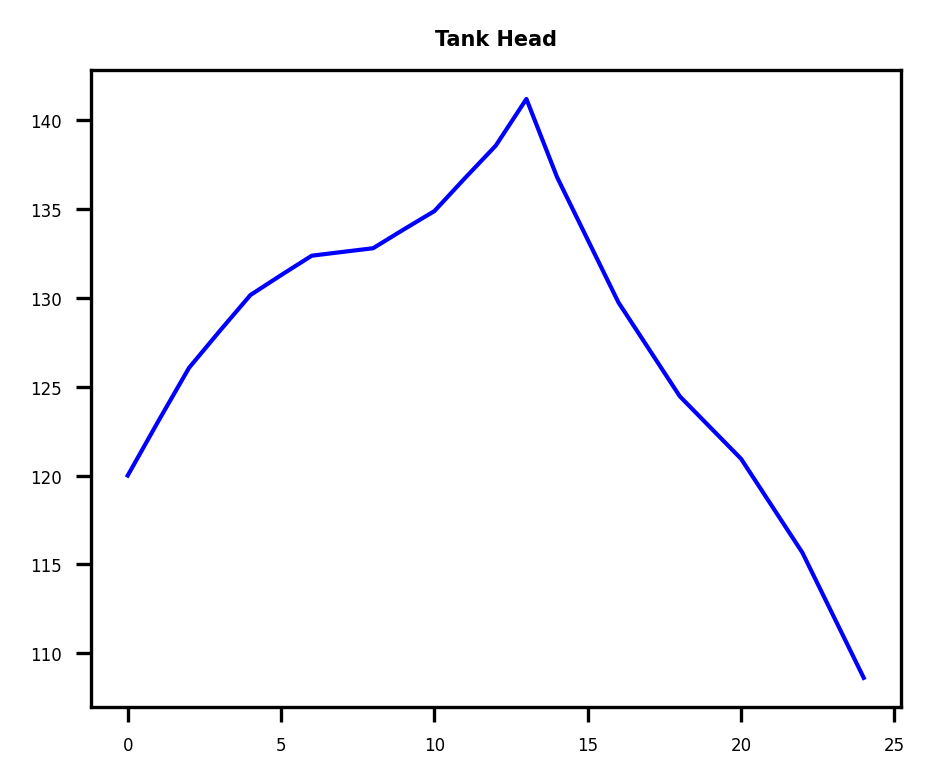

In [8]:
d.plot_ts(Y=tankHead, title='Tank Head', marker=False)

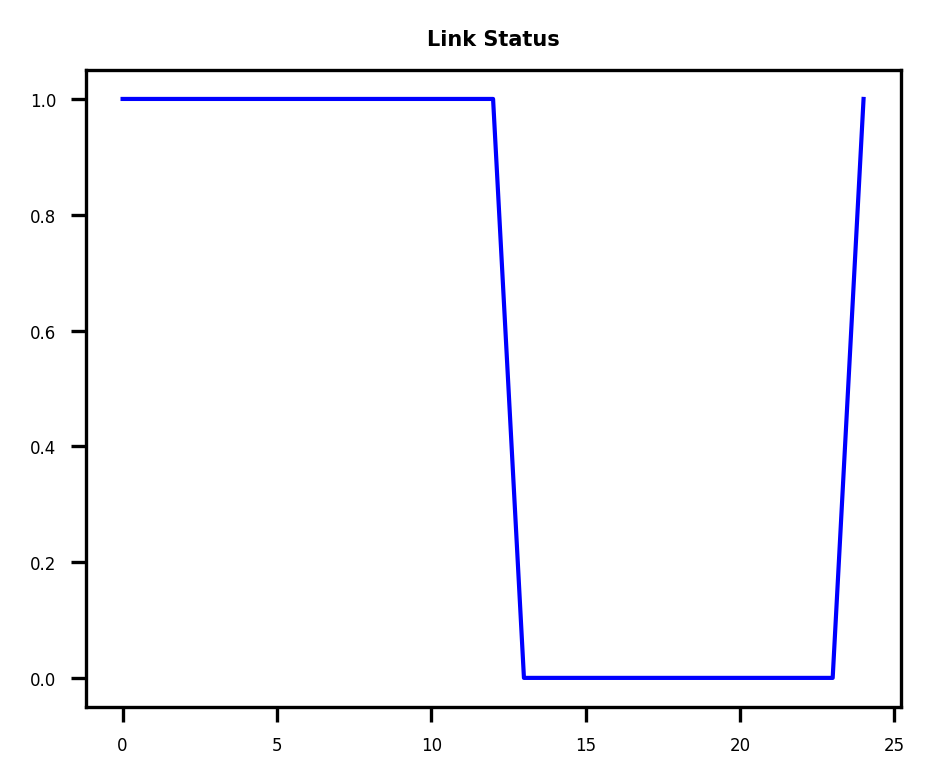

In [9]:
d.plot_ts(Y=S, title='Link Status', marker=False)

In [10]:
# Unload library.
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.

